<img src=../figures/Brown_logo.svg width=50%>

## Data-Driven Design & Analyses of Structures & Materials (3dasm)

## Lecture 22

### Miguel A. Bessa | <a href = "mailto: miguel_bessa@brown.edu">miguel_bessa@brown.edu</a>  | Associate Professor

**What:** A lecture of the "3dasm" course

**Where:** This notebook comes from this [repository](https://github.com/bessagroup/3dasm_course)

**Reference for entire course:** Murphy, Kevin P. *Probabilistic machine learning: an introduction*. MIT press, 2022. Available online [here](https://probml.github.io/pml-book/book1.html)

**How:** We try to follow Murphy's book closely, but the sequence of Chapters and Sections is different. The intention is to use notebooks as an introduction to the topic and Murphy's book as a resource.
* If working offline: Go through this notebook and read the book.
* If attending class in person: listen to me (!) but also go through the notebook in your laptop at the same time. Read the book.
* If attending lectures remotely: listen to me (!) via Zoom and (ideally) use two screens where you have the notebook open in 1 screen and you see the lectures on the other. Read the book.

**Optional reference (the "bible" by the "bishop"... pun intended 😆) :** Bishop, Christopher M. *Pattern recognition and machine learning*. Springer Verlag, 2006.

**References/resources to create this notebook:**
* This simple tutorial is still based on a script I created for this article: https://imechanica.org/node/23957
* It follows from some examples provided by the scikit-learn user guide, which seem to have originated from Mathieu Blondel, Jake Vanderplas, Vincent Dubourg, and Jan Hendrik Metzen.
* Creating a new StandardScaler for Gaussian Processes: https://stats.stackexchange.com/questions/364418/how-to-get-the-prediction-std-using-gaussian-process-in-scikit-learn
* The flower to explain the Iris dataset comes from this [source](https://www.ritchieng.com/machine-learning-iris-dataset/)

Apologies in advance if I missed some reference used in this notebook. Please contact me if that is the case, and I will gladly include it here.

## **OPTION 1**. Run this notebook **locally in your computer**:
1. Confirm that you have the '3dasm' mamba (or conda) environment (see Lecture 1).
2. Go to the 3dasm_course folder in your computer and pull the last updates of the [repository](https://github.com/bessagroup/3dasm_course):
```
git pull
```
    - Note: if you can't pull the repo due to conflicts (and you can't handle these conflicts), use this command (with **caution**!) and your repo becomes the same as the one online:
```
git reset --hard origin/main
```
3. Open command window and load jupyter notebook (it will open in your internet browser):
```
jupyter notebook
```
5. Open notebook of this Lecture and choose the '3dasm' kernel.

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook for this Lecture.

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

## Outline for today

* Introduction to Supervised Learning for Classification

**Reading material**: This notebook + (Sections 1.2.1 + 2.4.2 + 10.1 + 10.2)

# Logistic regression

Last lecture we showed what is classification and how we can make predictions using available packages.

* Today we will derive the simplest classification model: Binary Logistic Regression

It's also very common to convert our target (output) data from strings to integers!

In this case we have three discrete target values ('Iris-setosa', 'Iris-versicolor' and 'Iris-virginica') so we can convert to 0, 1 and 2 (respectively):

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures # For Polynomial basis functions
from sklearn.pipeline import make_pipeline # to link different objects
from matplotlib import cm # to change colors of surface plots

# Simple plot of Logistic Regression predictions using only two features
def train_and_predict_LogReg_countour(X, y, feature1, feature2, target_names):
    # X: features
    # y: labels
    # feature1: string of the first feature
    # feature2: string of the second feature
    
    n_classes = np.size(target_names)
    # WARNING: we did not scale our data because this dataset is really simple, but NEVER do that!!!
    C = 1e5  # Logistic Regression regularization parameter.
             # It is actually the inverse of regularization strength; must be a positive float.
             # Like in support vector machines, smaller values specify stronger regularization.

    degree = 1 # Degree of polynomial is usually considered to be 1 (so usually, you don't even make a pipeline).
               #    Note: in this dataset, if you consider degree > 2, the 'l-bfgs' optimizer with default
               #          parameters does not converge but you can use 'newton-cholesky' in those cases.

    LogReg_model = make_pipeline(PolynomialFeatures(degree), LogisticRegression(C=C, solver='lbfgs')) # model

    LogReg_model.fit(X, y) # HERE WE ARE USING ONLY 2 FEATURES TO FIT THE MODEL!
                           # This is just to assess the predictive power of the SVC even though
                           #  it is only using 2 features for training.
                           # REMEMBER: WE USUALLY USE ALL FEATURES WHEN TRAINING A MODEL.
    if n_classes == 3:
        plot_colors = 'ryb' # defining colors for each category
    elif n_classes == 2:
        plot_colors = 'rb' # defining colors for each category
    #
    plot_step = 5e-3 # defining the meshgrid step size

    # Create grid for plot:
    x1_iris_data, x2_iris_data = X[:, 0], X[:, 1]

    x1_iris_data_min, x1_iris_data_max = x1_iris_data.min() - 1, x1_iris_data.max() + 1 # define min & max of feature 0
    x2_iris_data_min, x2_iris_data_max = x2_iris_data.min() - 1, x2_iris_data.max() + 1 # define min & max of feature 1
    X1_iris_data_grid, X2_iris_data_grid = np.meshgrid(np.arange(x1_iris_data_min, x1_iris_data_max, plot_step),
                                                       np.arange(x2_iris_data_min, x2_iris_data_max, plot_step))
    # Predict for grid points:
    y_iris_data_LogReg_pred = LogReg_model.predict(np.c_[X1_iris_data_grid.ravel(), X2_iris_data_grid.ravel()])
    Y_iris_data_LogReg_grid = y_iris_data_LogReg_pred.reshape(X1_iris_data_grid.shape)

    fig1, ax1 = plt.subplots(tight_layout=True)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    ax1.contourf(X1_iris_data_grid, X2_iris_data_grid, Y_iris_data_LogReg_grid, cmap=cm.RdYlBu, alpha=0.8)

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_iris_data == i)
        ax1.scatter(X[idx, 0], X[idx, 1], c=color,
                    label=target_names[i], edgecolor='black', s=15)

    ax1.set_xlim(X1_iris_data_grid.min(), X1_iris_data_grid.max())
    ax1.set_ylim(X2_iris_data_grid.min(), X2_iris_data_grid.max())
    ax1.set_xlabel(feature1, fontsize=20)
    ax1.set_ylabel(feature2, fontsize=20)
    ax1.legend(loc='lower right', borderpad=0, handletextpad=0, fontsize=15)
    ax1.set_title('Logistic regression', fontsize=20)

Let's start by recalling the prediction we obtained with Logistic Regression for the Iris dataset

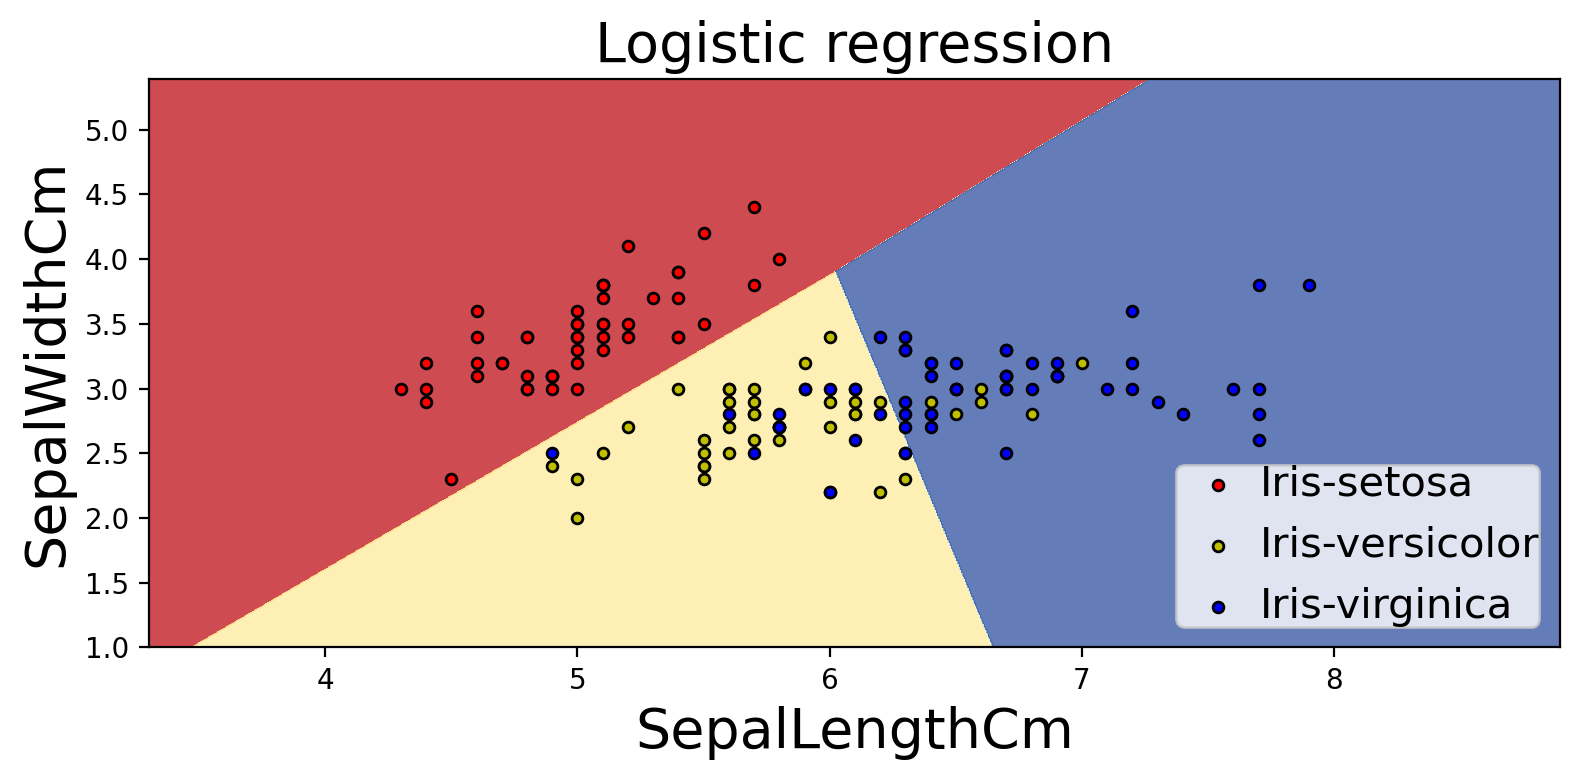

In [3]:
iris_data = pd.read_csv('../data/data_iris.csv')
feature1 = 'SepalLengthCm'
feature2 = 'SepalWidthCm'
X_2d_iris_data = iris_data.loc[:, [feature1,feature2] ].values # just use 2 inputs (features)
y_string_iris_data = iris_data.loc[:, 'Species'].values
target_names = iris_data.loc[:, 'Species'].unique()
y_iris_data = pd.Categorical(pd.factorize(y_string_iris_data)[0])

train_and_predict_LogReg_countour(X_2d_iris_data, y_iris_data, feature1, feature2, target_names)

### The simplest classification algorithm: Logistic regression

Logistic regression is a simple classification model $p(y|\mathbf{x}, \mathbf{z})$, where $\mathbf{x} \in \mathbb{R}^D$ is a fixed-dimensional input vector, $y \in \{1, . . . , C\}$ is the class label, and $\mathbf{z}$ are the parameters (rvs).

* If $C = 2$, this is known as **binary logistic regression**;

* If $C > 2$, it is known as **multinomial logistic regression**, or alternatively, multiclass logistic regression.

### Binary Logistic (or sigmoid) regression

Let's start by considering **binary logistic regression**, i.e. a case where we only have two classes as output: $C = 2$.

Previously when we focused on *regression* we assumed the observation distribution to be a Gaussian probability distribution function (pdf) because we had a continuous output $y$.

* However, here we need to use the **Bernoulli distribution**: a **probability mass function** (pmf) because $y$ is a **discrete** rv (e.g. 0 or 1) as we are now focusing on binary classification problems.

The Bernoulli distribution is one of the simplest distributions that exists!

The pmf of the Bernoulli distribution has only **one parameter** $\rho$ and is simply written as:

$$
\text{Ber}(y|\rho) = \begin{cases}
      \begin{align} 1- \rho & \quad \text{if } y = 0\\
      \rho & \quad \text{if }  y = 1
      \end{align}
    \end{cases}
$$

Or, in a more concise form:

$$
\text{Ber}(y|\rho) = \rho^y (1-\rho)^{1-y}
$$

where $y$ can only be $0$ or $1$.

Note that pmf's need to sum to 1, so $\rho$ is the probability of the event $y$ and it needs to be within $0 \leq \rho \leq 1$.

* **Recall**: the integral of pdf's is 1, so the sum of pmf's is 1 (integrals become sums when the integrand is discrete) and the pmf is an actual probability (not a probability density, as in pdf's).

For example, the Bernoulli pmf can be used to characterize a binary event like a coin toss where $y=1$ is when it lands heads, and $y=0$ is when it lands tails.

Text(0.5, 1.0, 'Bernoulli distribution for mean paramater $\\rho = $0.3')

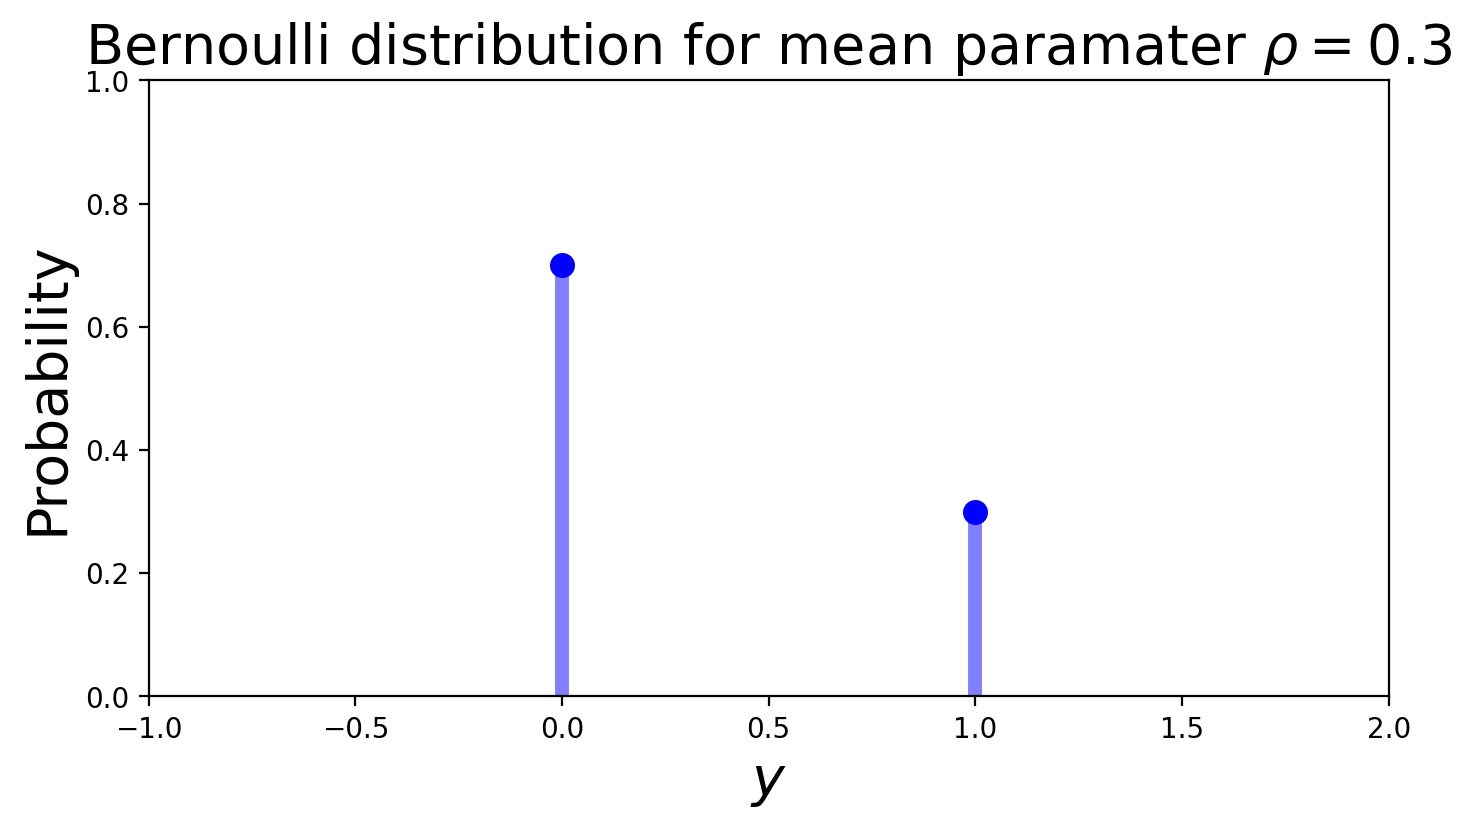

In [4]:
from scipy.stats import bernoulli
fig2, ax2 = plt.subplots(1, 1)

rho = 0.3 # mean of Bernoulli distribution

y = [0, 1] # rv following a Bernoulli distribution

ax2.plot(y, bernoulli.pmf(y, rho), 'bo', ms=8, label='bernoulli pmf')

ax2.vlines(y, 0, bernoulli.pmf(y, rho), colors='b', lw=5, alpha=0.5)
ax2.set_xlim([-1 ,2])
ax2.set_ylim([0, 1])
ax2.set_xlabel('$y$', fontsize=20)
ax2.set_ylabel('Probability', fontsize=20)
ax2.set_title(r'Bernoulli distribution for mean paramater $\rho = $%1.1f' % rho, fontsize=20)

Understanding classification with **logistic regression** is quite simple after deriving several linear regression models!

* **Note: go back to Lecture 11 and see how similar it is to today's lecture!**

We will be playing only one small trick: we will use the sigmoid function, as we will see soon!

Bur before we play that trick, we start by assuming the observation distribution to be the following Bernoulli pmf:

$p(y|\mathbf{x}, \mathbf{z}) = \text{Ber}\left(y| \rho = f(\mathbf{x}, \mathbf{z}) \right)$

where the function $f(\mathbf{x}, \mathbf{z})$ predicts the **mean parameter** $\rho$ of the Bernoulli distribution.

Logistic regression assumes a linear model for the mean, so we write $f(\mathbf{x}, \mathbf{z})=\mathbf{w}^T \boldsymbol{\phi}(\mathbf{x})$.

* Of course, later we will create nonlinear models for the mean and also use different observation distributions...

Like before, we have:

* the vector $\mathbf{w} = [w_0, w_1, w_2 ..., w_{M-1}]^T$ including the **bias** term $w_0$ and the remaining **weights** $w_m$ with $m=0,..., M-1$.
* and the basis functions remain a vector but where each element also acts on a vector $\mathbf{x}$, where $x_d$ has $D$ features: $\boldsymbol{\phi}(\mathbf{x}) = [\phi_0(\mathbf{x}), \phi_1(\mathbf{x}), \phi_2(\mathbf{x}) ..., \phi_{M-1}(\mathbf{x})]^T$

For example, for a 2D input (2 features) $\mathbf{x}=[x_1, x_2]^T$ the quadratic polynomial basis has $M=6$ leading to: 

$$
\rho= w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2
$$

So, we write the observation distribution for logistic regression as:

$p(y|\mathbf{x}, \mathbf{z}) = \text{Ber}(\; y\, |\, \rho = \underbrace{\mathbf{w}^T \boldsymbol{\phi}(\mathbf{x})}_{f(\mathbf{x}, \mathbf{z})} \;)$

but where we need to explicitly mention that $0 \leq f(\mathbf{x}, \mathbf{z}) \leq 1$.

* For the regression when we used the Gaussian distribution we did not need to include these contraints because it was a continuous distribution!

This is **not** a detail. It has profound implications!

To avoid writing the Bernoulli distribution and the corresponding constraint on the mean, i.e. $ 0 \leq f(\mathbf{x}, \mathbf{z}) \leq 1$, we can still consider an **unconstrained function** $f(\mathbf{x}, \mathbf{z})$ for describing $\rho$ if we use the **sigmoid (or logistic) function**:

$$
\sigma\left(f(\mathbf{x}, \mathbf{z})\right) = \frac{1}{1+e^{-f(\mathbf{x}, \mathbf{z})}}
$$

$$
\sigma\left(a\right) = \frac{1}{1+e^{-a}}
$$

where $a = f(\mathbf{x}, \mathbf{z})$ is called the **logit function** or pre-activation function.

The "sigmoid" function is very important in machine learning because:

* It maps the whole real line into $[0,1]$

* This is necessary for the output to be interpreted as a probability (and hence a valid value for the Bernoulli mean parameter $\rho$).

* Think about the sigmoid (or logistic) function as a **"soft" version of the Heaviside** (or step) function:

    $H(a)=\mathbb{1}(a>0)$, where $\mathbb{1}$ is called the indicator function (it turns to 1 when the argument is true, and zero otherwise).

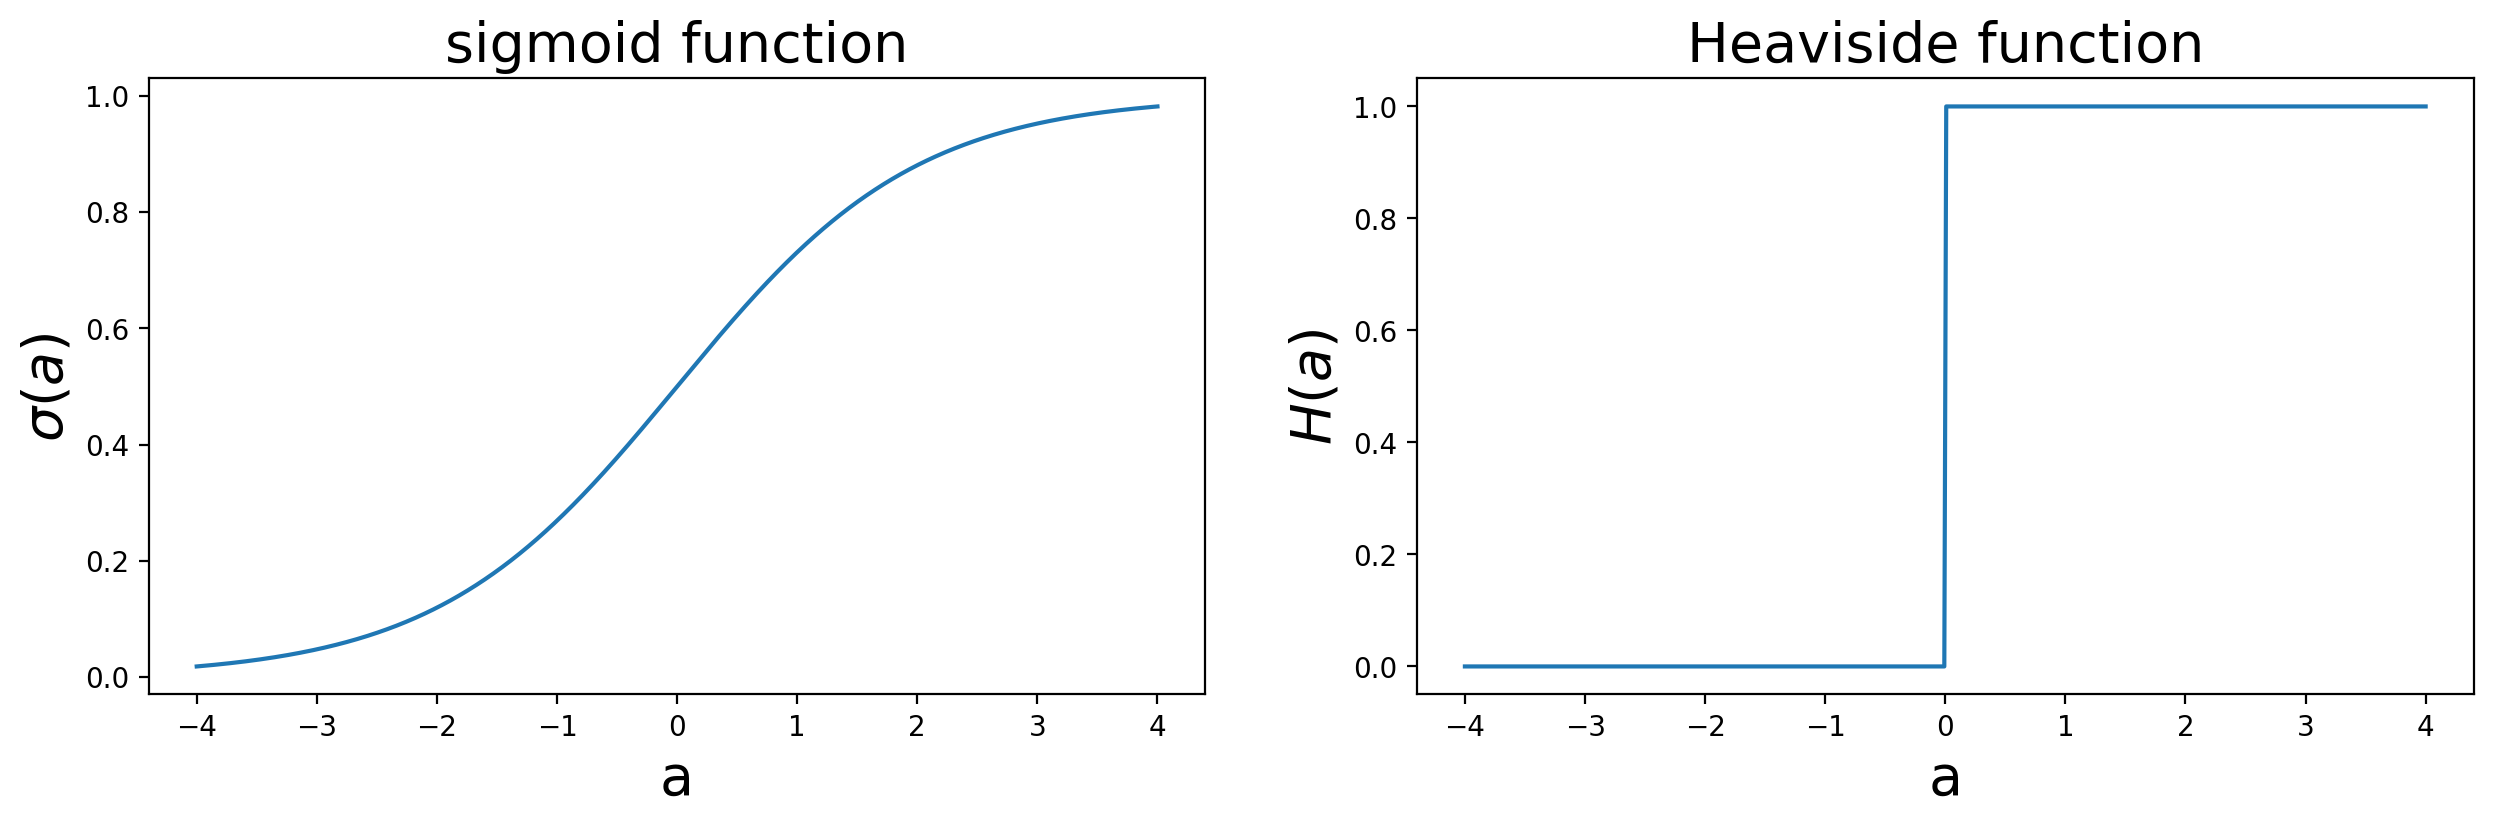

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Plot sigmoid function
a = np.linspace(-4, 4, 1001) # using many points to plot the heaviside properly
sigmoid = 1/(1+np.exp(-a))
fig3, (ax3_1, ax3_2) = plt.subplots(1, 2) # create a plot with 2 subplots side-by-side
ax3_1.plot(a, sigmoid)
ax3_1.set_title("sigmoid function",fontsize=20)
ax3_1.set_xlabel("a",fontsize=20)
ax3_1.set_ylabel(r"$\sigma(a)$",fontsize=20)
# Plot Heaviside function
heaviside = np.heaviside(a,0.5)
ax3_2.plot(a, heaviside)
ax3_2.set_title("Heaviside function",fontsize=20)
ax3_2.set_xlabel("a",fontsize=20)
ax3_2.set_ylabel(r"$H(a)$",fontsize=20)
fig3.set_size_inches(15, 4) # scale figure to be wider (since there are 2 subplots)

The great advantage of the sigmoid function compared to the Heaviside function is that it is easily differentiable, plus it has some very interesting mathematical properties:

$\begin{align}
\sigma(a) = \frac{1}{1+e^{-a}}=\frac{e^{a}}{1+e^{a}}\\
\frac{d}{d a}\sigma(a) = \sigma(a)\left(1-\sigma(a)\right)\\
1-\sigma(a) = \sigma(-a)\\
\sigma^{-1}(p) = \log{\frac{p}{1-p}}=\text{logit}(p)\\
\sigma_+(a) = \log{(1+e^a)} = \text{softplus}(a)\\
\frac{d}{d a}\sigma_+(a)=\sigma(a)
\end{align}
$

### Binary Logistic Regression model

We are now ready to define the logistic regression model.

1. Bernoulli observation distribution: $p(y|\mathbf{x}, \mathbf{z}) = \text{Ber}\left(y| \rho = \sigma\left(\mathbf{w}^T \boldsymbol{\phi}(\mathbf{x})\right) \right)$

    where $\mathbf{z} = \mathbf{w}$ are all the unknown model parameters (hidden rv's).

2. Uniform prior distribution for each hidden rv $\mathbf{z}$: $p(\mathbf{z}) \propto 1$
    * Note: we can also use a Gaussian prior.

3. MLE point estimate for posterior: $\hat{\mathbf{z}}_{\text{mle}} = \underset{z}{\mathrm{argmin}}\left[-\sum_{i=1}^{N}\log{ p(y=y_i|\mathbf{x}=\mathbf{x}_i, \mathbf{z})}\right]$
    * Note: if we use a Gaussian prior, then it becomes the MAP estimate.

Finally, the <font color='orange'>PPD</font>: $\require{color}
{\color{orange}p(y^*|\mathbf{x}^*, \mathcal{D})} = \int p(y^*|\mathbf{x}^*,\mathbf{z}) \delta(\mathbf{z}-\hat{\mathbf{z}}) d\mathbf{z} = p(y^*|\mathbf{x}^*, \mathbf{z}=\hat{\mathbf{z}})$

And the final class prediction is given by the **mode** of the PPD: $y^* = \underset{y}{\mathrm{argmax}}\left[ p(y|\mathbf{x}^*, \mathbf{z}=\hat{\mathbf{z}}) \right]$

Now is a good time to stop and think about the differences between a regression model and a classification model.

Let's play a game!

In [6]:
from scipy.stats import norm

# Define the function y = x * sin(x)
def f(x):
    return x * np.sin(x)


def Gaussian_PPD_riding_mean_prediction(point_x=1.0):
    xmin = 0.0
    xmax = 8.0
    npoints = 100

    # Generate x values for the ground truth function and calculate y values
    x_func = np.linspace(xmin, xmax, npoints)
    y_func = f(x_func)

    # Specify the point where we want to overlay the Gaussian distribution
    #point_x = 1.5
    point_y = f(point_x)

    # Parameters for the Gaussian distribution
    mean = point_y  # Mean of the distribution
    std_dev = 1.0  # Standard deviation
    
    ymin = np.min(y_func)-2*std_dev # just to define y-axis plot limits
    ymax = np.max(y_func)+2*std_dev # just to define y-axis plot limits

    # Generate data for the Gaussian distribution
    y_values_from_pdf = np.linspace(mean - 1.96 * std_dev,
                                    mean + 1.96 * std_dev, 100) # samples of y to calculate respective pdf
    pdf_values = norm.pdf(y_values_from_pdf, mean, std_dev) # probablility densities of Gaussian that
                                                            # will be displayed in the x-axis
    pdf_values_scaled = pdf_values/(np.max(pdf_values))*(xmax-xmin)/20 # scaled so that they are visible

    fig, ax = plt.subplots(1, 1)
    # Plot the a schematic of a PPD (Gaussian distribution to be shown vertically):
    ax.plot(pdf_values_scaled+point_x,y_values_from_pdf, color='orange',
             label=r'PPD: $\mathcal{N}(y*|x*=%2.2f, \mathcal{D})$' %point_x)  
    ax.fill_betweenx(y_values_from_pdf,pdf_values_scaled+point_x, point_x, color='orange', alpha=0.25)

    # Plot a curve that should illustrate the predicted mean:
    ax.plot(x_func, y_func, label=r'Predicted mean: $\mu^*(x)$', color='black')

    # Highlight the point where the Gaussian is centered
    ax.scatter([point_x], [point_y], color='orange', marker="*", label=r'$\mu^*(x=%2.2f)$' %point_x)
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')  # X-axis
    ax.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Y-axis

    # Adding labels and title
    ax.set_title('Schematic of Regression model and its PPD at a point')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.axis([xmin, xmax, ymin, ymax])
    ax.legend()
    ax.grid()
    plt.figure(figsize=(6, 3))

In [7]:
# Showing posteriors and Dirac delta with interactive plot. Code is hidden in presentation.
from ipywidgets import interactive # so that we can interact with the plot
interactive_plot = interactive(Gaussian_PPD_riding_mean_prediction,
                       point_x=(0.0, 8.0))
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='point_x', max=8.0), Output()), _dom_classes=('widget…

In [8]:
from scipy.stats import bernoulli

# Define a function that outputs a categorical variable
def true_function(x,jump_location): # The Heaviside function creates the simplest classification example
    return np.heaviside(x-jump_location, 0.5)

# Define the sigmoid function:
def sigmoid(a): 
    return 1/(1+np.exp(-a))

# let's simply define a linear basis function with corresponding weights:
def f_x_comma_z(x, z):
    w_0 = z[0]
    w_1 = z[1]
    return w_0 + x*w_1

def Gaussian_PPD_riding_mean_prediction(point_x=1.5,
                                        w_0 = 0.0, w_1 = 1.0):
    xmin = 0.0
    xmax = 8.0
    npoints = 1000
    
    jump_location = 4.0 # in case we want to change where the Heaviside function jumps

    # Generate x values for the ground truth function and calculate y values
    x_func = np.linspace(xmin, xmax, npoints)
    y_func = true_function(x_func,jump_location)
    
    # Specify the point where we want to overlay the Gaussian distribution
    #point_x = 1.5
    point_y = true_function(point_x,jump_location)

    # Parameter for the Bernoulli distribution
    mean = point_y  # Mean is the rho parameter
    
    ymin = -2.0 # just to define y-axis plot limits
    ymax = 2.0 # just to define y-axis plot limits

    # Now calculate the sigmoid of that linear model:
    z = [w_0, w_1] # collect weights into z vector
    sigmoid_at_point_x = sigmoid( f_x_comma_z(point_x,z) ) # calculate sigmoid of linear model
    
    PPD_mean_at_point_x = sigmoid_at_point_x # mean of Bernoulli distribution is the result of the sigmoid
    
    PPD_mean = sigmoid( f_x_comma_z(x_func,z) )
    
    # Generate data for the Gaussian distribution
    y_values_from_pmf = [0, 1] # the output of a Bernoulli distribution can only be 0 or 1
    pmf_values = bernoulli.pmf(y_values_from_pmf, PPD_mean_at_point_x) # output the probability of y=0 and of y=1
                                                            # this will be shown in the x-axis
    # In this case, there is no need to scale the probabilities to make them visible...
    #pmf_values_scaled = pmf_values/1*(xmax-xmin)/10 # scaled so that they are visible

    fig, ax = plt.subplots(1, 1)
    
    ax.plot(x_func, y_func, label=r'Ground truth', color='black', linewidth=2.0)
    
    # Plot the a schematic of a PPD (Gaussian distribution to be shown vertically):
    ax.plot(bernoulli.pmf(y_values_from_pmf, PPD_mean_at_point_x)+point_x,y_values_from_pmf, 'bo', ms=8,
            label='PPD: Bernoulli distribution')
    ax.hlines(y_values_from_pmf,pmf_values+point_x, point_x, colors='b', lw=5, alpha=0.5)
    ax.vlines(point_x,0.0,1.0, color='black', linewidth=2.5, linestyle='--')  # to show the support domain
    
    ax.plot(x_func, f_x_comma_z(x_func,z),
            label=r'$f(x,\mathbf{z})$ with $\mathbf{z}=[w_0=%2.1f, w_1=%2.1f]^T$' %(w_0,w_1),
            color='red', linewidth=1.0, linestyle='--' )

    # Plot a curve that should illustrate the predicted mean:
    
    ax.plot(x_func, PPD_mean, label=r'PPD mean: $\rho^*(x)=\sigma[f(x^*,\mathbf{z})]$',
            color='orange', linewidth=2.0, linestyle='--')
    
    # Highlight the point where the mean of the Bernoulli PPD is located:
    ax.scatter([point_x], [PPD_mean_at_point_x], color='orange', marker="o", s=50,
               label=r'Mean of PPD at point_x: $\rho^*(x=%2.2f)$' %point_x)
    
    if PPD_mean_at_point_x>= 0.5:
        PPD_mode_at_point_x = 1.0
    else:
        PPD_mode_at_point_x = 0.0
    #
    ax.scatter([point_x], [PPD_mode_at_point_x], color='blue', marker="*", s=200,
               label=r'Mode of PPD at point_x: $y^*(x=%2.2f)$' %point_x)
    
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')  # X-axis

    # Adding labels and title
    ax.set_title('Schematic of Classification model and its PPD at a point')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.axis([xmin, xmax, ymin, ymax])
    ax.legend(loc='lower right')
    ax.grid()
    plt.figure(figsize=(6, 3))

In [9]:
# Showing posteriors and Dirac delta with interactive plot. Code is hidden in presentation.
from ipywidgets import interactive # so that we can interact with the plot
interactive_plot = interactive(Gaussian_PPD_riding_mean_prediction,
                       point_x=(0.0, 8.0), w_0=(-4.0, 0.0), w_1 = (-1.0, 1.0))
interactive_plot

interactive(children=(FloatSlider(value=1.5, description='point_x', max=8.0), FloatSlider(value=0.0, descripti…

As we did before, we determine the PPD by the MLE point estimate

$\begin{align}
\text{NLL}(\mathbf{w}) =& -\log \prod_{n=1}^N \text{Ber}(y_n|\rho_n)\\
=& -\sum_{n=1}^N \log [\rho_n^{y_n}\times(1-\rho_n)^{1-y_n}]\\
=& -\sum_{n=1}^N [y_n\log \rho_n + (1-y_n)\log(1-\rho_n)]\\
=& \sum_{n=1}^N \mathbb{H}(y_n,\rho_n)
\end{align}
$

where $\rho_n = \sigma(a_n)$ is the probability of class 1, $a_n = \mathbf{w}^T\boldsymbol{\phi}(\mathbf{x}_n)$ is the log odds (or pre-activation, as mentioned above), and $\mathbb{H}(y_n,\rho_n)$ is called the **binary cross entropy** loss in deterministic ML (recall that in a deterministic view of ML, we think about loss functions, instead of posterior and PPD).

The binary cross entropy loss is then defined as:

$$
\mathbb{H}(p,q) = -[p\log q + (1-p)\log(1-q)]
$$

* As usual, how do we find the MLE point estimate?

Minimize the negative log likelihood by computing the gradient wrt the unknowns $\mathbf{z}$ (in this case $\mathbf{z}=\mathbf{w})$:

$\begin{align}
\text{NLL}(\mathbf{w})=&\mathbf{0}
\end{align}
$

$\require{color}\begin{align}
\nabla_{\mathbf{w}}\text{NLL}(\mathbf{w})=& -\sum_{n=1}^N [y_n{\color{blue}\nabla_{\mathbf{w}}\log \rho_n} + (1-y_n){\color{green}\nabla_{\mathbf{w}}\log(1-\rho_n)}]
\end{align}
$

where the colored terms, ${\color{blue}\nabla_{\mathbf{w}}\log \rho_n} = \frac{1}{\rho_n}{\color{red}\nabla_{\mathbf{w}}\rho_n}$ and ${\color{green}\nabla_{\mathbf{w}}\log(1-\rho_n)} = -\frac{1}{1-\rho_n}{\color{red}\nabla_{\mathbf{w}}\rho_n}$, depend on the same term highlighted in red (using index notation):

$
{\color{red}\frac{\partial}{\partial w_d}\rho_n} = \frac{\partial}{\partial w_d}\sigma(\mathbf{w}^T \boldsymbol{\phi}(x)) = \frac{\partial}{\partial a_n}\sigma(a_n) \frac{\partial a_n}{\partial w_d} = \rho_n(1-\rho_n)\phi_{nd} \equiv \rho_n(1-\rho_n)\boldsymbol{\phi}({x_n})
$

$\begin{align}
\nabla_{\mathbf{w}}\text{NLL}(\mathbf{w})=& -\sum_{n=1}^N [y_n{\color{blue}(1-\rho_n)\boldsymbol{\phi}({x_n})} + (1-y_n){\color{green}\rho_n\boldsymbol{\phi}({x_n})}]
\end{align}
$

The gradient of the NLL wrt to the unknowns can then be simplified as follows:

$\begin{align}
\nabla_{\mathbf{w}}\text{NLL}(\mathbf{w})=& -\sum_{n=1}^N [y_n(1-\rho_n)\boldsymbol{\phi}({x_n})+ (1-y_n)\rho_n\boldsymbol{\phi}({x_n})]\\
=& -\sum_{n=1}^N [y_n\boldsymbol{\phi}({x_n})-y_n\boldsymbol{\phi}({x_n})\rho_n - \boldsymbol{\phi}({x_n})\rho_n + y_n\boldsymbol{\phi}({x_n})\rho_n]\\
=& -\sum_{n=1}^N (\rho_n-y_n)\boldsymbol{\phi}({x_n})\\
=& \mathbf{I}_N^T \left[\text{diag}\left(\boldsymbol{\rho}-\mathbf{y}\right)\boldsymbol{\Phi}\right]\\
\end{align}
$

That has a nice intuitive interpretation as the sum of the differences between the observed target (output or label) and the prediction $\rho_n$, weighted by the input basis vectors $\boldsymbol{\phi}(x_n)$.

* It can also be shown that the point of zero gradient is actually a global optimum (just like in linear regression), by calculating the second derivative of the NLL wrt to the unknowns (called the **Hessian**) and noting that it is positive semi-definite. (See book or notes below).

#### Note on the Hessian of NLL for logistic regression

$
\mathbf{H}(\mathbf{w}) = \nabla_{\mathbf{w}}\nabla_{\mathbf{w}}^T \text{NLL}(\mathbf{w}) = \sum_{n=1}^N (\rho_n (1-\rho_n)\boldsymbol{\phi}({x_n}))\boldsymbol{\phi}({x_n})^T = \boldsymbol{\Phi}^T\mathbf{S}\boldsymbol{\Phi}
$

where $\mathbf{S} = \text{diag}\left( \rho_1 (1-\rho_1), \ldots, \rho_N (1-\rho_N) \right)$.

This result implies $\mathbf{H}$ is positive definite, since for any nonzero vector $\mathbf{v}$, we have:

$
\mathbf{v}^T\boldsymbol{\Phi}^T \mathbf{S}\boldsymbol{\Phi}\mathbf{v} = (\mathbf{v}^T\boldsymbol{\Phi}^T\mathbf{S}^{1/2})(\mathbf{S}^{1/2}\boldsymbol{\Phi}\mathbf{v}) = || \mathbf{v}^T\boldsymbol{\Phi}^T\mathbf{S}^{1/2} ||_2^2 > 0
$

which follows from $\rho_n>0$ for all $n$, because of the use of the sigmoid function. Consequently the NLL is strictly convex. However, in practice, values of $\rho_n$ which are close to 0 or 1 might cause the Hessian to be close to singular. As we learned in linear regression when introducing ridge regression, we can avoid this by considering a Gaussian prior (i.e. $\ell_2$ regularization). 

## Point estimate for binary logistic regression

Now that we found the $\text{NLL}$ and its gradient wrt to the unknowns:

$
\text{NLL}(\mathbf{w}) = -\sum_{n=1}^N [y_n\log \rho_n + (1-y_n)\log(1-\rho_n)]
$

$
\nabla_{\mathbf{w}}\text{NLL}(\mathbf{w})= \mathbf{I}_N^T \left[\text{diag}\left(\boldsymbol{\rho}-\mathbf{y}\right)\boldsymbol{\Phi}\right]
$

we can then use a gradient-based optimization algorithm (many can be used) to find the minimum of the NLL, i.e. the MLE point estimate.

The usual optimizer of choice for this method is the same we used for Gaussian processes! Do you still remember which one?

* **L-BFGS**

#### Note: optimizer to determine point estimate for logistic regression

You may recall (Lecture 11 where we covered regression with Linear Least Squares), that in linear regression we determined the point estimate even without needing to use an optimizer (it was a closed form expression).

This is not the case for classification with logistic regression because the sigmoid trick causes the gradient to be slightly more complicated  the NLL is 

But there are many others that also work (it's a pretty well behaved loss landscape!), for example: *SAGA* (fast convergence but important to standardize dataset), and *Newton's method* (but required the calculation of the Hessian).

Once the optimizer provides us with the point estimate $\hat{\mathbf{z}} = {\color{red}\hat{\mathbf{w}}}$, we can get our prediction via the PPD:

Final prediction is given by the <font color='orange'>PPD</font>: $\require{color}
{\color{orange}p(y^*|\mathbf{x}^*, \mathcal{D})} = \int p(y^*|\mathbf{x}^*,\mathbf{z}) \delta(\mathbf{z}-\hat{\mathbf{z}}) d\mathbf{z} = p(y^*|\mathbf{x}^*, \mathbf{z}=\hat{\mathbf{z}}) = \text{Ber}\left(y^*| \rho = \sigma\left({\color{red}\hat{\mathbf{w}}}^T \boldsymbol{\phi}(\mathbf{x}^*)\right) \right)$

Although we already saw the predictions in the previous lecture, let's see a few more predictions for simplified cases.

For example, if we consider the Iris dataset but considering only two classes: Iris-Virginica and Iris-Versicolor.



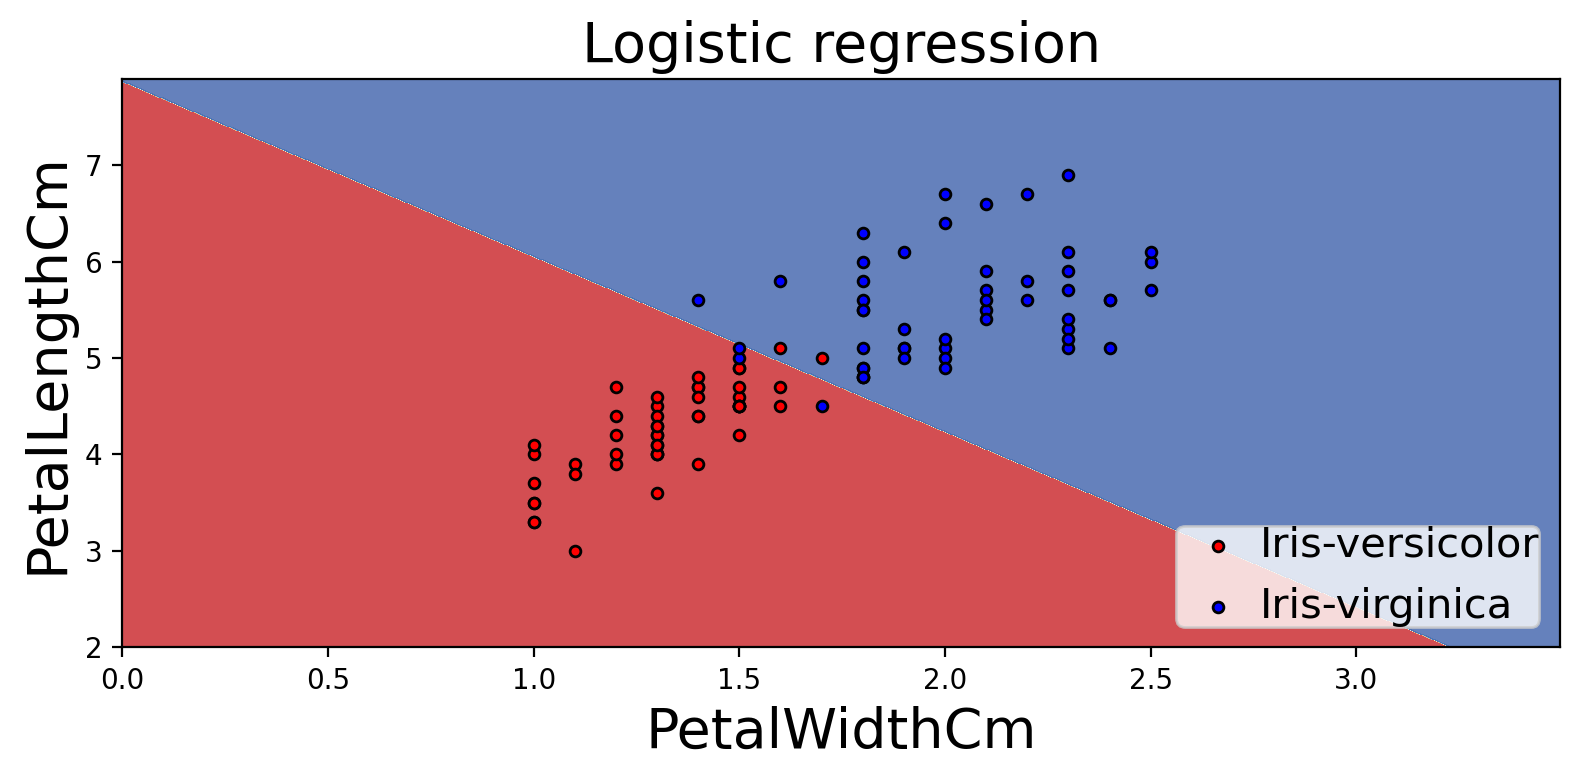

In [10]:
feature1 = 'PetalWidthCm'
feature2 = 'PetalLengthCm'
# Let's only retrieve the samples for Iris-versicolor and Iris-virginica
X_2d_iris_data = iris_data.loc[50:, [feature1,feature2] ].values # just use 2 inputs (features)
y_string_iris_data = iris_data.loc[50:, 'Species'].values
target_names = iris_data.loc[50:, 'Species'].unique()
y_iris_data = pd.Categorical(pd.factorize(y_string_iris_data)[0])

train_and_predict_LogReg_countour(X_2d_iris_data, y_iris_data, feature1, feature2, target_names)

Let's now make a prediction using only **one feature** (Petal width) and using only 2 classes (Iris-versicolor and Iris-virginica)

In [11]:
feature1 = 'PetalWidthCm'
# Let's only retrieve the samples for 2 classes (sample 51 onwards): Iris-versicolor and Iris-virginica
x = iris_data.loc[50:, feature1 ].values # just use 2 inputs (features)
y_strings = iris_data.loc[50:, 'Species'].values
target_names = iris_data.loc[50:, 'Species'].unique()
y = pd.Categorical(pd.factorize(y_strings)[0])

n_classes = np.size(target_names)
# WARNING: we did not scale our data because this dataset is really simple, but NEVER do that!!!
C = 1e5  # Logistic Regression regularization parameter.
         # It is actually the inverse of regularization strength; must be a positive float.
         # Like in support vector machines, smaller values specify stronger regularization.

LogReg_model = LogisticRegression(C=C, solver='lbfgs') # model

LogReg_model.fit(x.reshape(-1,1), y) # HERE WE ARE USING ONLY 2 FEATURES TO FIT THE MODEL!
                       # This is just to assess the predictive power of the SVC even though
                       #  it is only using 2 features for training.
                       # REMEMBER: WE USUALLY USE ALL FEATURES WHEN TRAINING A MODEL.

parameters = LogReg_model.get_params()
print(parameters)

{'C': 100000.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [12]:
plot_colors = 'ry' # defining colors for the 2 classes
plot_step = 5e-3 # defining the meshgrid step size

#parameters = lr.fit(x, y, lambd=1)

x_plot = np.linspace(0, 3, 1000).reshape(-1, 1)
rho = LogReg_model.predict_proba(x_plot) # outputs the rho and 1-rho parameters (class probabilities)
decision_boundary = x_plot[rho[:,0] < 0.5][0] # locate the decision boundary (point where rho = 0.5)

fig4, ax4 = plt.subplots(1, 1)
ax4.scatter(x[y == 0], y[y == 0], s=15, c="r", marker="s")
ax4.scatter(x[y == 1], y[y == 1], s=15, c="b", marker="^")
ax4.plot(
    [decision_boundary, decision_boundary],
    [-1, 2],
    color="black",
    linestyle=":",
    label="Decision boundary",
    linewidth = 4.0
)
ax4.plot(x_plot, rho[:,0], "r-", label=target_names[0])
ax4.plot(x_plot, rho[:,1], "b--", label=target_names[1])

ax4.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc="r", ec="r")
ax4.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc="b", ec="b")

ax4.set_xlabel(feature1,fontsize=20)
ax4.set_ylabel("Probabilities", fontsize=20)
ax4.set_title(r"Decision boundary but also showing $\rho$ and $(1-\rho)$ probabilities", fontsize=20)
ax4.legend(bbox_to_anchor=(1, 1),fontsize=15)
ax4.axis([0, 3, -0.02, 1.02])
fig4.set_size_inches(8, 6) # scale figure to be larger
plt.close(fig4)

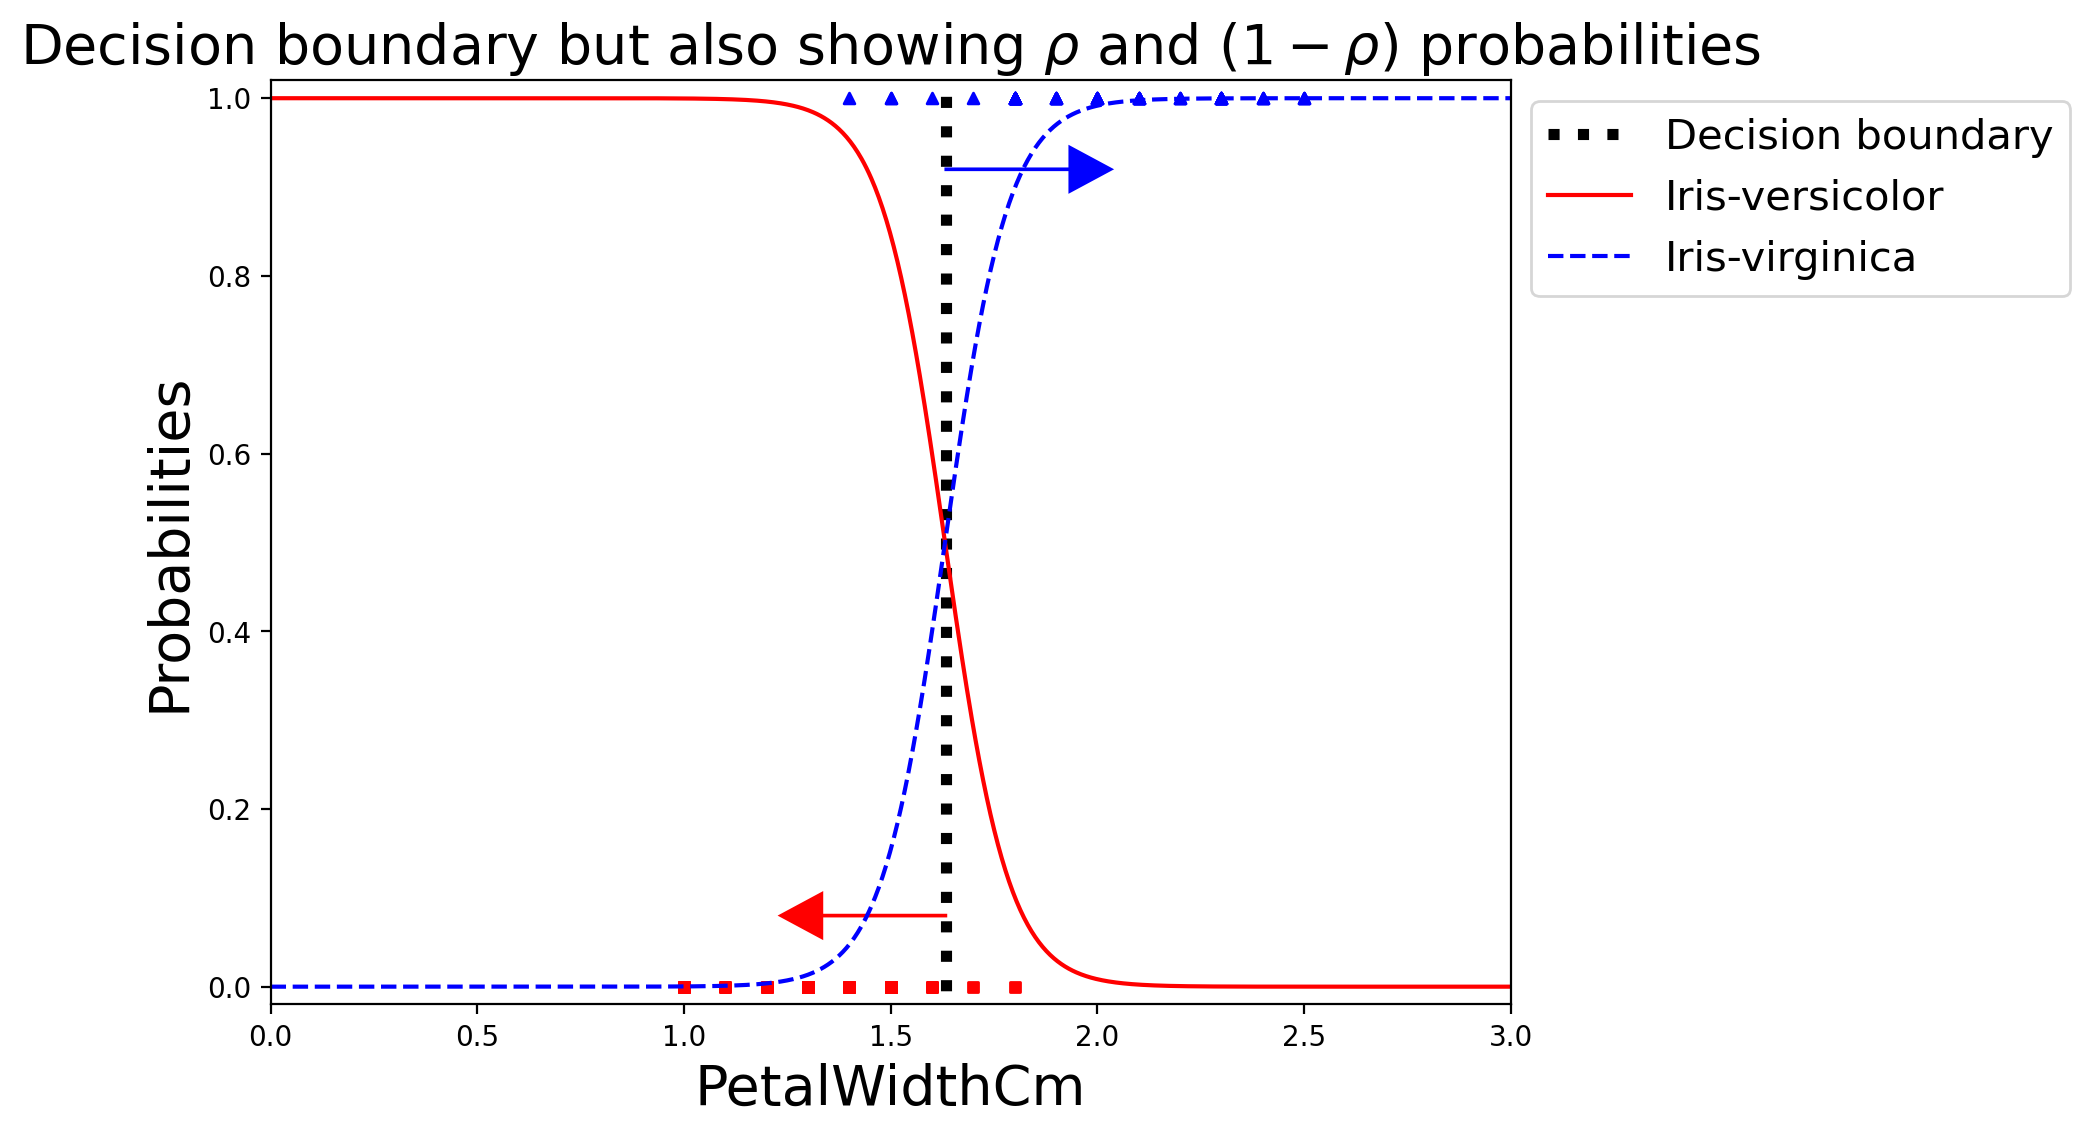

In [13]:
# Logistic Regression only for 1 feature (Petal Width) and 2 classes (Iris-versicolor and Iris-virginica)
fig4 # Plot rho and rho-1 probabilities, as well as the corresponding decision boundary

Note: you don't see 50 samples of each class because multiple points become on top of each other (they have the same Petal Width, although they have different values for the other features)

### Multinomial Logistic Regression model

We saw in the last lecture and the beginning of this one that we can also do classification for more than 2 classes.

**Multinomial** logistic regression is a trivial generalization of binary logistic regression:

1. Instead of the Bernoulli distribution (which is binary), we need to use the **Categorical distribution**.

2. Instead of using the sigmoid function, we need to use the **softmax** function.

Of course, the Categorical distribution when we have two classes reduces to the Bernoulli distribution, and the softmax reduces to the sigmoid...

Summary of **Multinomial Logistic Regression** model:

1. Categorical observation distribution: $p(y|\mathbf{x}, \mathbf{z}) = \text{Cat}\left(y| \boldsymbol{\rho} = \text{softmax}\left(\mathbf{W}^T \boldsymbol{\phi}(\mathbf{x})\right) \right)$

    where $\mathbf{z} \equiv \mathbf{W}$ is now a **matrix** containing all the unknown model parameters (hidden rv's).


2. Uniform prior distribution for each hidden rv $\mathbf{z}$: $p(\mathbf{z}) \propto 1$


3. MLE point estimate for posterior: $\hat{\mathbf{z}}_{\text{mle}} = \underset{z}{\mathrm{argmin}}\left[-\sum_{i=1}^{N}\log{ p(y=y_i|\mathbf{x}=\mathbf{x}_i, \mathbf{z})}\right]$


The <font color='orange'>PPD</font>: $\require{color}
{\color{orange}p(y^*|\mathbf{x}^*, \mathcal{D})} = \int p(y^*|\mathbf{x}^*,\mathbf{z}) \delta(\mathbf{z}-\hat{\mathbf{z}}) d\mathbf{z} = p(y^*|\mathbf{x}^*, \mathbf{z}=\hat{\mathbf{z}})$

And the final class $c^*$ prediction is given by the mode of the PPD: $c^* = \underset{y^*}{\mathrm{argmax}}\left[ p(y^*|\mathbf{x}^*, \mathbf{z}=\hat{\mathbf{z}}) \right]$

#### Categorical distribution

The Categorical distribution is also a discrete probability distribution (pmf) but has one parameter $\rho_c$ per class $c$:

$$
\text{Cat}(y|\boldsymbol{\rho}) = \prod_{c=1}^C \rho_c^{\mathbb{1}(y=c)}
$$

where $\mathbb{1}$ is the indicator function (in this case, it becomes 1 when $y=c$, and zero otherwise).

As before, the $\rho_c$ parameter is a probability for that class:

$$
p(y=c|\boldsymbol{\rho})=\rho_c
$$

where $0 \leq \rho_c \leq 1$ and $\sum_{c=1}^C \rho_c = 1$, which means that there are only $C-1$ independent parameters.

#### Note on one-hot encoding

It's also possible to write the Categorical distribution in a simpler way by converting the discrete variable $y$ into a **one-hot vector** with $C$ elements, all of which are 0 except for the entry corresponding to the class label.

For example, if $C=3$, we encode classes 1, 2 and 3 as $(1,0,0)$, $(0,1,0)$, and $(0,0,1)$. More generally, we can encode classes using unit vectors, where $\mathbf{e}_c$ is all 0s except the dimension $c$.

Using one-hot encodings, the Categorical distribution becomes:

$$
\text{Cat}(\mathbf{y}|\boldsymbol{\rho}) = \prod_{c=1}^C \rho_c^{y_c}
$$

#### Softmax function

As we did in binary logistic regression, we define the observation distribution as:

$$
p(y|\mathbf{x}, \mathbf{z}) = \text{Cat}\left(y|\boldsymbol{\rho}= \mathbf{f}(\mathbf{x},\mathbf{z}) \right)
$$

where we require that $0 \leq f_c(\mathbf{x},\mathbf{z}) \leq 1$ and $\sum_{c=1}^C f_c(\mathbf{x},\mathbf{z})=1$.

The softmax function does the same as the sigmoid, but now for multiple classes:

$$
\text{softmax}(\mathbf{a}) = \left[ \frac{e^{a_1}}{\sum_{c'=1}^C e^{a_{c'}}}, \ldots, \frac{e^{a_C}}{\sum_{c'=1}^C e^{a_{c'}}} \right]
$$

which maps $\mathbb{R}^C$ to $[0,1]^C$ and satisfies the constraints that $0 \leq \text{softmax} \leq 1$ and $\sum_{c=1}^C \text{softmax}(\mathbf{a}_c)=1$.

Calculating the $\text{NLL}$ and its gradient is done very similarly to what was done for binary logistic regression. See Section 10.3.2

## What about going Bayesian??

Similarly to what we did in linear regression, we can also go Bayesian with logistic regression to capture uncertainty:

* Bayesian logistic regression

However, unlike Bayesian linear regression, it is not possible to compute the posterior exactly for a logistic regression model...

Study Section 10.5, if you are curious about this!

### See you next class

Have fun!